In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('fastFashionCompDim.csv', sep = '|') 
print(df1)

FileNotFoundError: [Errno 2] No such file or directory: 'fastFashionCompDim.csv'

In [ ]:
f1 = pd.read_csv('fastFashionCompDim.csv', sep = '|')
df2 = pd.read_csv('fastFasionItemsDim.csv', sep ='|') 
merged_df = pd.merge(df1, df2, on='item_code' , how='inner') 
print(merged_df)

In [11]:
merged_df.head()

,item_code,part_name,material,percent,item_name,item_desc,join_life,joinlife_title,joinlife_desc,item_price
0,200000,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
1,200001,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
10,200008,EXTERIOR,lino,100%,BLUSA LINO BOLSILLOS,"""Blusa de cuello redondo y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% lino de cultivo...,"""Este lino se cultiva de forma natural, sin ri...",1299
11,200009,EXTERIOR,lino,100%,BLUSA LINO BOLSILLOS,"""Blusa de cuello redondo y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% lino de cultivo...,"""Este lino se cultiva de forma natural, sin ri...",1299
12,200010,EXTERIOR,lino,100%,BLUSA LINO BOLSILLOS,"""Blusa de cuello redondo y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% lino de cultivo...,"""Este lino se cultiva de forma natural, sin ri...",1299


In [14]:
merged_df.describe()

,item_code,item_price
count,163.000000,163.000000
mean,332539.269939,1456.030675
std,124660.142076,519.210338
min,100000.000000,595.000000
25%,300000.000000,999.000000
50%,400008.000000,1299.000000
75%,400038.000000,1795.000000
max,500033.000000,2995.000000


In [15]:
merged_df.columns

Index(['item_code', 'part_name', 'material', 'percent', 'item_name',
       'item_desc', 'join_life', 'joinlife_title', 'joinlife_desc',
       'item_price'],
      dtype='object')

In [16]:
merged_df.shape

(163, 10)

In [18]:
num_featers = merged_df.select_dtypes(include=['int64', 'float64']).columns
cat_featers = merged_df.select_dtypes(include='object').columns

In [21]:
merged_df.isnull()

,item_code,part_name,material,percent,item_name,item_desc,join_life,joinlife_title,joinlife_desc,item_price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
445,False,False,False,False,False,False,False,False,False,False
446,False,False,False,False,False,False,False,False,False,False
447,False,False,False,False,False,False,False,False,False,False
448,False,False,False,False,False,False,False,False,False,False


In [23]:
merged_df.isnull().sum().sort_values(ascending=False)[:50]

item_code         0
part_name         0
material          0
percent           0
item_name         0
item_desc         0
join_life         0
joinlife_title    0
joinlife_desc     0
item_price        0
dtype: int64

In [27]:
merged_df.dropna()

,item_code,part_name,material,percent,item_name,item_desc,join_life,joinlife_title,joinlife_desc,item_price
0,200000,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
1,200001,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
10,200008,EXTERIOR,lino,100%,BLUSA LINO BOLSILLOS,"""Blusa de cuello redondo y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% lino de cultivo...,"""Este lino se cultiva de forma natural, sin ri...",1299
11,200009,EXTERIOR,lino,100%,BLUSA LINO BOLSILLOS,"""Blusa de cuello redondo y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% lino de cultivo...,"""Este lino se cultiva de forma natural, sin ri...",1299
12,200010,EXTERIOR,lino,100%,BLUSA LINO BOLSILLOS,"""Blusa de cuello redondo y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% lino de cultivo...,"""Este lino se cultiva de forma natural, sin ri...",1299
...,...,...,...,...,...,...,...,...,...,...
445,500033,EXTERIOR,algodon,35%,PANTALÓN PITILLO,"""Pantalon de tiro medio. Cintura con elastico ...",True,JOIN LIFE Care for fiber: al menos 25% poliest...,"""Esta fibra se obtiene a partir del reciclaje ...",1299
446,500033,EXTERIOR,poliester,31%,PANTALÓN PITILLO,"""Pantalon de tiro medio. Cintura con elastico ...",True,JOIN LIFE Care for fiber: al menos 25% poliest...,"""Esta fibra se obtiene a partir del reciclaje ...",1299
447,500033,EXTERIOR,viscosa,17%,PANTALÓN PITILLO,"""Pantalon de tiro medio. Cintura con elastico ...",True,JOIN LIFE Care for fiber: al menos 25% poliest...,"""Esta fibra se obtiene a partir del reciclaje ...",1299
448,500033,EXTERIOR,lino,15%,PANTALÓN PITILLO,"""Pantalon de tiro medio. Cintura con elastico ...",True,JOIN LIFE Care for fiber: al menos 25% poliest...,"""Esta fibra se obtiene a partir del reciclaje ...",1299


In [29]:
merged_df.duplicated()

0      False
1      False
10     False
11     False
12     False
       ...  
445    False
446    False
447    False
448    False
449    False
Length: 163, dtype: bool

In [30]:
merged_df.drop_duplicates()

,item_code,part_name,material,percent,item_name,item_desc,join_life,joinlife_title,joinlife_desc,item_price
0,200000,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
1,200001,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
10,200008,EXTERIOR,lino,100%,BLUSA LINO BOLSILLOS,"""Blusa de cuello redondo y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% lino de cultivo...,"""Este lino se cultiva de forma natural, sin ri...",1299
11,200009,EXTERIOR,lino,100%,BLUSA LINO BOLSILLOS,"""Blusa de cuello redondo y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% lino de cultivo...,"""Este lino se cultiva de forma natural, sin ri...",1299
12,200010,EXTERIOR,lino,100%,BLUSA LINO BOLSILLOS,"""Blusa de cuello redondo y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% lino de cultivo...,"""Este lino se cultiva de forma natural, sin ri...",1299
...,...,...,...,...,...,...,...,...,...,...
445,500033,EXTERIOR,algodon,35%,PANTALÓN PITILLO,"""Pantalon de tiro medio. Cintura con elastico ...",True,JOIN LIFE Care for fiber: al menos 25% poliest...,"""Esta fibra se obtiene a partir del reciclaje ...",1299
446,500033,EXTERIOR,poliester,31%,PANTALÓN PITILLO,"""Pantalon de tiro medio. Cintura con elastico ...",True,JOIN LIFE Care for fiber: al menos 25% poliest...,"""Esta fibra se obtiene a partir del reciclaje ...",1299
447,500033,EXTERIOR,viscosa,17%,PANTALÓN PITILLO,"""Pantalon de tiro medio. Cintura con elastico ...",True,JOIN LIFE Care for fiber: al menos 25% poliest...,"""Esta fibra se obtiene a partir del reciclaje ...",1299
448,500033,EXTERIOR,lino,15%,PANTALÓN PITILLO,"""Pantalon de tiro medio. Cintura con elastico ...",True,JOIN LIFE Care for fiber: al menos 25% poliest...,"""Esta fibra se obtiene a partir del reciclaje ...",1299


In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 449
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   item_code       163 non-null    int64 
 1   part_name       163 non-null    object
 2   material        163 non-null    object
 3   percent         163 non-null    object
 4   item_name       163 non-null    object
 5   item_desc       163 non-null    object
 6   join_life       163 non-null    bool  
 7   joinlife_title  163 non-null    object
 8   joinlife_desc   163 non-null    object
 9   item_price      163 non-null    int64 
dtypes: bool(1), int64(2), object(7)
memory usage: 12.9+ KB


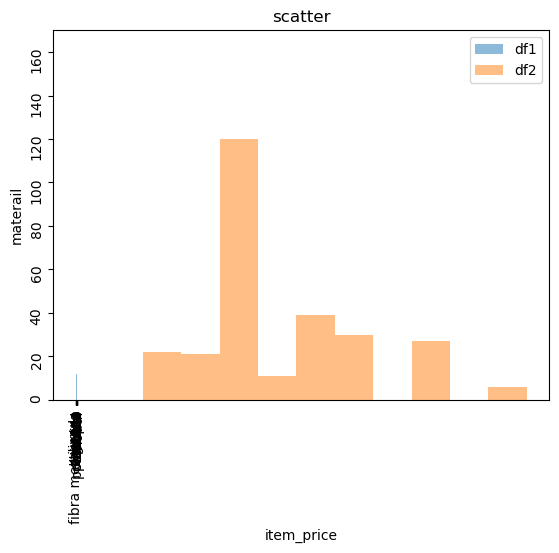

In [49]:
plt.hist(df1['material'], bins=10, alpha=0.5, label='df1')
plt.hist(df2['item_price'], bins=10, alpha=0.5, label='df2')
plt.xlabel('item_price')
plt.ylabel('materail')
plt.title('scatter') 
plt.xticks 
plt.yticks
plt.legend()
plt.show()

<BarContainer object of 163 artists>

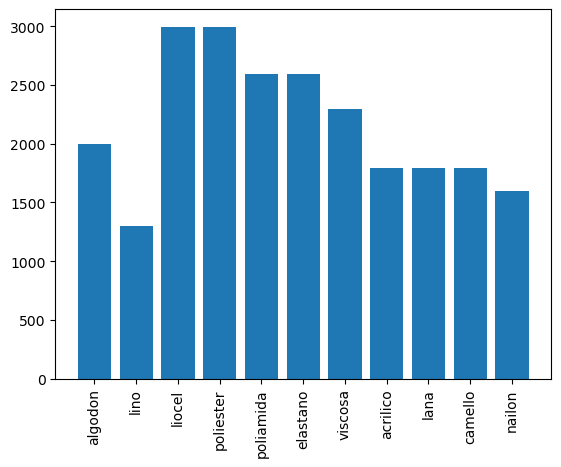

In [48]:
plt.xticks(rotation=90)
plt.bar(height=merged_df['item_price'], x=merged_df['material'])

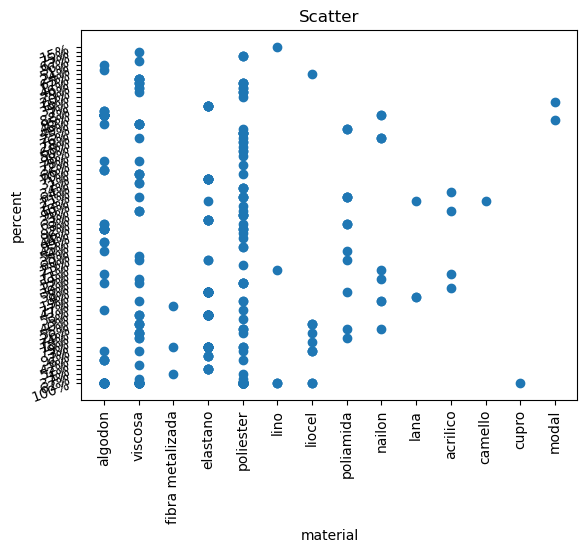

In [46]:
plt.scatter(df1['material'], df1['percent'])
plt.xticks(rotation=90)
plt.yticks(rotation=20)
plt.title("Scatter")
plt.xlabel("material")
plt.ylabel("percent")

plt.show()

In [37]:
import seaborn as sns

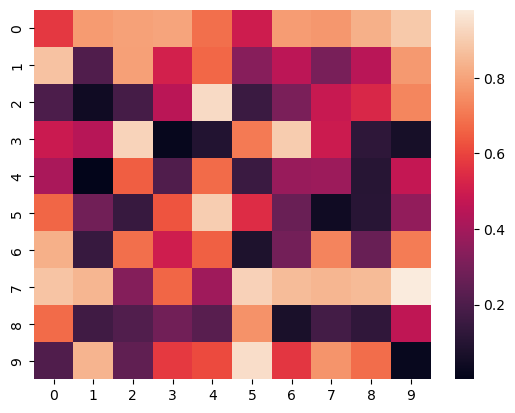

In [32]:
data = (np.random.rand(10, 10))


sns.heatmap(data)

plt.show()

([<matplotlib.patches.Wedge at 0x1c313e767d0>,
 [Text(0.9801071672559598, 0.4993895680663527, 'material'),
  Text(-0.33991877217145816, 1.046162142464278, 'percent'),
  Text(-0.49938947630209474, -0.9801072140121813, 'item_price'),
  Text(1.0461621822461364, -0.3399186497354948, 'part_name')])

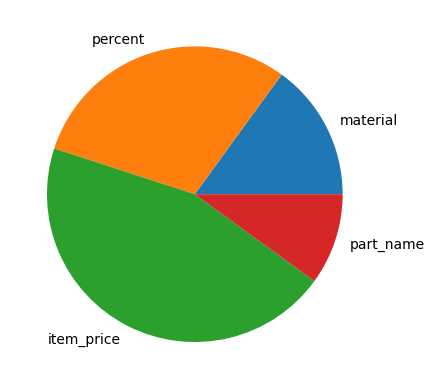

In [2]:
import matplotlib.pyplot as plt
labels = 'material', 'percent', 'item_price', 'part_name'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

Analyse de données pour HM_stores 

In [4]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 

In [5]:
import pandas as pd
pd = pd.read_csv('HM_all_stores.csv')

In [6]:
pd.head()

,storeCode,storeClass,name,phone,city,country,countryCode,longitude,latitude,timeZoneIndex,...,Tue_open_hours,Wed_open_hours,Thu_open_hours,Fri_open_hours,Sat_open_hours,Sun_open_hours,streetName1,streetName2,state,address_string
0,AE0122,Red,Mirdiff city center,+971-42316646,Dubai,United Arab Emirates,AE,55.424840,25.226280,165.0,...,10:00-22:00,10:00-22:00,10:00-23:55,10:00-23:55,10:00-23:55,10:00-22:00,Mirdiff city center,Sheikh Mohammad Bin Zayed Road,Dubai,Mirdiff city center;Sheikh Mohammad Bin Zayed ...
1,AE0149,Flagship,Dubai Mall,+971-44190346,Dubai,United Arab Emirates,AE,55.278446,25.197506,165.0,...,10:00-23:00,10:00-23:00,10:00-23:55,10:00-23:55,10:00-23:00,10:00-23:00,Dubai Mall,Sheikh Zayed Road,Dubai,Dubai Mall;Sheikh Zayed Road;Dubai;Dubai;Dubai
2,AE0209,Blue,Al Markaziyah,+971-26120870,Abu Dhabi,United Arab Emirates,AE,54.357462,24.487245,165.0,...,10:00-22:00,10:00-22:00,10:00-23:00,10:00-23:00,10:00-22:00,10:00-22:00,Al Markaziyah,World Trade Center Mall,Abu Dhabi,Al Markaziyah;World Trade Center Mall;123;Abu ...
3,AE0223,Blue,Abu Dhabi-Dubai Rd - Abu Dhabi,+971-26120851,Abu Dhabi,United Arab Emirates,AE,54.671499,24.523875,165.0,...,10:00-22:00,10:00-22:00,10:00-23:55,10:00-23:55,10:00-20:00,10:00-22:00,Abu Dhabi-Dubai Rd - Abu Dhabi,Al Bahia - Al Shahama,Abu Dhabi,Abu Dhabi-Dubai Rd - Abu Dhabi;Al Bahia - Al S...
4,AE0273,Flagship,Yas Mall,+971-24926530,Abu Dhabi,United Arab Emirates,AE,54.609720,24.488684,165.0,...,10:00-22:00,10:00-22:00,10:00-23:55,10:00-23:55,10:00-22:00,10:00-22:00,Yas Mall,NaN,Abu Dhabi,Yas Mall;;x;Abu Dhabi


In [7]:
pd.describe()

,longitude,latitude,timeZoneIndex
count,4292.000000,4292.000000,4289.000000
mean,17.298810,40.167707,115.934017
std,65.487986,17.449655,61.721152
min,-158.051943,-43.532996,2.000000
25%,-0.362545,34.180576,100.000000
50%,12.198888,44.803550,100.000000
75%,37.964040,51.348067,145.000000
max,176.104461,69.965270,290.000000


In [8]:
pd.columns

Index(['storeCode', 'storeClass', 'name', 'phone', 'city', 'country',
       'countryCode', 'longitude', 'latitude', 'timeZoneIndex',
       'Mon_open_hours', 'Tue_open_hours', 'Wed_open_hours', 'Thu_open_hours',
       'Fri_open_hours', 'Sat_open_hours', 'Sun_open_hours', 'streetName1',
       'streetName2', 'state', 'address_string'],
      dtype='object')

In [9]:
pd.shape

(4292, 21)

In [20]:
num_featers = pd.select_dtypes(include=['int64', 'float64']).columns
cat_featers = pd.select_dtypes(include='object').columns

In [10]:
pd.isnull()

,storeCode,storeClass,name,phone,city,country,countryCode,longitude,latitude,timeZoneIndex,...,Tue_open_hours,Wed_open_hours,Thu_open_hours,Fri_open_hours,Sat_open_hours,Sun_open_hours,streetName1,streetName2,state,address_string
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [11]:
pd.isnull().sum().sort_values(ascending=False)[:50]

streetName2       2465
state             1861
Sun_open_hours    1144
phone              152
Mon_open_hours      34
Fri_open_hours      34
Sat_open_hours      34
Tue_open_hours      34
Wed_open_hours      34
Thu_open_hours      34
timeZoneIndex        3
storeClass           3
name                 2
streetName1          0
storeCode            0
latitude             0
longitude            0
countryCode          0
country              0
city                 0
address_string       0
dtype: int64

In [13]:
pd.dropna()

,storeCode,storeClass,name,phone,city,country,countryCode,longitude,latitude,timeZoneIndex,...,Tue_open_hours,Wed_open_hours,Thu_open_hours,Fri_open_hours,Sat_open_hours,Sun_open_hours,streetName1,streetName2,state,address_string
0,AE0122,Red,Mirdiff city center,+971-42316646,Dubai,United Arab Emirates,AE,55.424840,25.226280,165.0,...,10:00-22:00,10:00-22:00,10:00-23:55,10:00-23:55,10:00-23:55,10:00-22:00,Mirdiff city center,Sheikh Mohammad Bin Zayed Road,Dubai,Mirdiff city center;Sheikh Mohammad Bin Zayed ...
1,AE0149,Flagship,Dubai Mall,+971-44190346,Dubai,United Arab Emirates,AE,55.278446,25.197506,165.0,...,10:00-23:00,10:00-23:00,10:00-23:55,10:00-23:55,10:00-23:00,10:00-23:00,Dubai Mall,Sheikh Zayed Road,Dubai,Dubai Mall;Sheikh Zayed Road;Dubai;Dubai;Dubai
2,AE0209,Blue,Al Markaziyah,+971-26120870,Abu Dhabi,United Arab Emirates,AE,54.357462,24.487245,165.0,...,10:00-22:00,10:00-22:00,10:00-23:00,10:00-23:00,10:00-22:00,10:00-22:00,Al Markaziyah,World Trade Center Mall,Abu Dhabi,Al Markaziyah;World Trade Center Mall;123;Abu ...
3,AE0223,Blue,Abu Dhabi-Dubai Rd - Abu Dhabi,+971-26120851,Abu Dhabi,United Arab Emirates,AE,54.671499,24.523875,165.0,...,10:00-22:00,10:00-22:00,10:00-23:55,10:00-23:55,10:00-20:00,10:00-22:00,Abu Dhabi-Dubai Rd - Abu Dhabi,Al Bahia - Al Shahama,Abu Dhabi,Abu Dhabi-Dubai Rd - Abu Dhabi;Al Bahia - Al S...
5,AE0412,Red,Street E,+971-44190590,Dubai,United Arab Emirates,AE,55.140564,25.077058,165.0,...,10:00-22:00,10:00-22:00,10:00-23:55,10:00-23:55,10:00-22:00,10:00-22:00,Street E,Dubai Marina Mall,Dubai,"Street E;Dubai Marina Mall;9440;St. E, Dubai M..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,ZA0024,Red,Boardwalk Mall,+27-860690707,Richards Bay,South Africa,ZA,32.051242,-28.752748,140.0,...,09:00-18:00,09:00-18:00,09:00-18:00,09:00-19:00,09:00-17:30,09:00-16:00,"Shop L17, Central","Cnr Krugerrand & Mark Strauss Rds,Richards Bay",Kwazulu-Natal,"Shop L17, Central;Cnr Krugerrand & Mark Straus..."
4286,ZA0027,Blue,Vincent Park,+27-860690707,East London,South Africa,ZA,27.904449,-32.983803,140.0,...,09:00-18:00,09:00-18:00,09:00-18:00,09:00-18:00,09:00-17:00,09:00-16:00,28 Devereux Avenue,"Vincent Park, East London",Eastern Cape,"28 Devereux Avenue;Vincent Park, East London;5..."
4287,ZA0028,Flagship,Canal Walk Shopping Centre,+27-860690707,Cape Town,South Africa,ZA,18.511386,-33.893271,140.0,...,09:00-21:00,09:00-21:00,09:00-21:00,09:00-21:00,09:00-21:00,09:00-21:00,Shop 205,"Century Boulevard, Century City, Cape Town",Western Cape,"Shop 205;Century Boulevard, Century City, Cape..."
4288,ZA0029,Blue,Loch Logan Waterfront,+27-860690707,Bloemfontein,South Africa,ZA,26.210716,-29.114604,140.0,...,09:00-18:00,09:00-18:00,09:00-18:00,09:00-18:00,08:30-17:00,09:00-15:00,Cnr henry Street and First Avenue,Westdene,Free State,Cnr henry Street and First Avenue;Westdene;930...


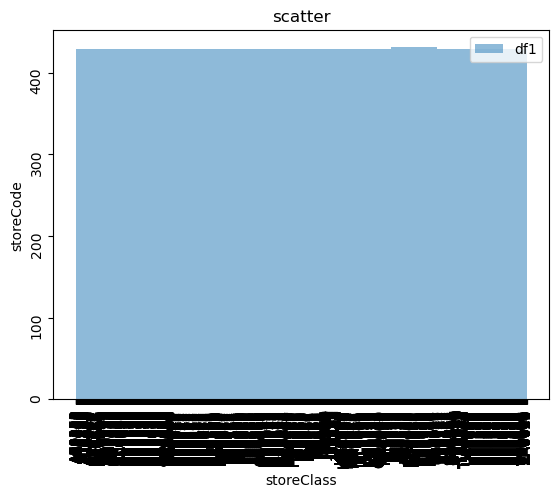

In [15]:
plt.hist(pd['storeCode'], bins=10, alpha=0.5, label='df1')
plt.xlabel('storeClass')
plt.ylabel('storeCode')
plt.title('scatter') 
plt.xticks(rotation=90) 
plt.yticks(rotation=90)
plt.legend()
plt.show()

<BarContainer object of 4292 artists>

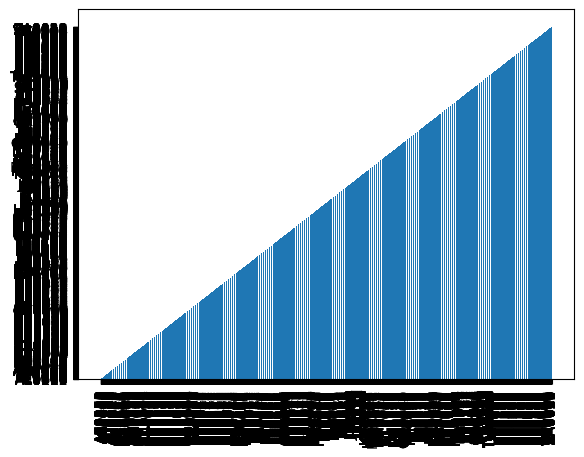

In [21]:
plt.xticks(rotation=90)
plt.bar(height= pd['storeCode'], x=pd['storeCode'])

([<matplotlib.patches.Wedge at 0x1c3501791e0>,
 [Text(0.9801071672559598, 0.4993895680663527, 'storeClass'),
  Text(-0.33991877217145816, 1.046162142464278, 'storeCode'),
  Text(-0.49938947630209474, -0.9801072140121813, 'phone'),
  Text(1.0461621822461364, -0.3399186497354948, 'city')])

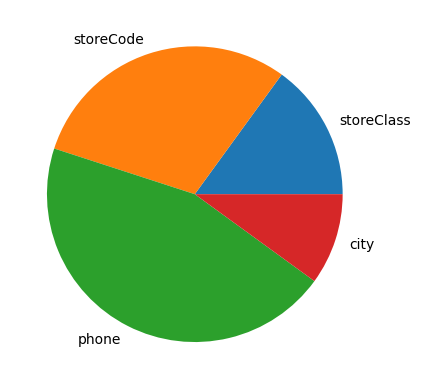

In [22]:
import matplotlib.pyplot as plt
labels = 'storeClass', 'storeCode', 'phone', 'city'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

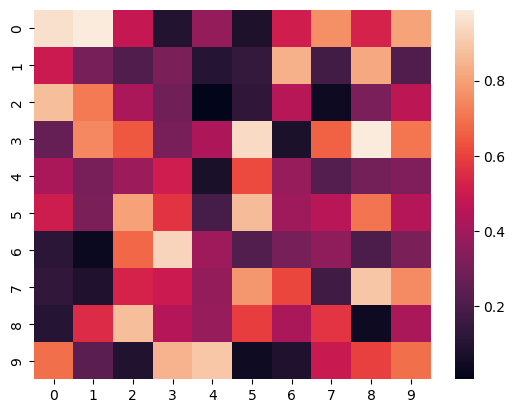

In [30]:
import seaborn as sns 
data = (np.random.rand(10, 10))


sns.heatmap(data)

plt.show()